In [63]:
import pandas as pd


trainingdata = pd.read_csv('mouse_training.csv')
testingdata1 = pd.read_csv('mouse_testing1.csv')
testingdata2 = pd.read_csv('mouse_testing2.csv')
testingdata3 = pd.read_csv('mouse_testing3.csv')

#DATA CLEANING

# Get rid of these columns due to missing data:
# BAD_N, BCL2_N, pCFOS_N, 
# H3AcK18_N, EGR1_N, H3MeK4_N
columnstodrop = ['Unnamed: 0', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'MouseID']

trainingdata = trainingdata.drop(columns=columnstodrop)
testingdata1 = testingdata1.drop(columns=columnstodrop)
testingdata2 = testingdata2.drop(columns=columnstodrop)
testingdata3 = testingdata3.drop(columns=columnstodrop)

#Drop any NaN values to allow input to the model:
trainingdata = trainingdata.dropna()
testingdata1 = testingdata1.dropna()
testingdata2 = testingdata2.dropna()
testingdata3 = testingdata3.dropna()

#Changing the classifiers to 1's and 0's

#Control is 0, Ts65Dn is 1 for genotypes
trainingdata.loc[trainingdata['Genotype'] == 'Control', 'Genotype'] = 0
trainingdata.loc[trainingdata['Genotype'] == 'Ts65Dn', 'Genotype'] = 1
testingdata1.loc[testingdata1['Genotype'] == 'Control', 'Genotype'] = 0
testingdata1.loc[testingdata1['Genotype'] == 'Ts65Dn', 'Genotype'] = 1
testingdata2.loc[testingdata2['Genotype'] == 'Control', 'Genotype'] = 0
testingdata2.loc[testingdata2['Genotype'] == 'Ts65Dn', 'Genotype'] = 1

#Memantine is 0, saline is 1 for treatment
trainingdata.loc[trainingdata['Treatment'] == 'Memantine', 'Treatment'] = 0
trainingdata.loc[trainingdata['Treatment'] == 'Saline', 'Treatment'] = 1
testingdata1.loc[testingdata1['Treatment'] == 'Memantine', 'Treatment'] = 0
testingdata1.loc[testingdata1['Treatment'] == 'Saline', 'Treatment'] = 1
testingdata2.loc[testingdata2['Treatment'] == 'Memantine', 'Treatment'] = 0
testingdata2.loc[testingdata2['Treatment'] == 'Saline', 'Treatment'] = 1

#C/S is 0, S/C is 1 for behavior
trainingdata.loc[trainingdata['Behavior'] == 'C/S', 'Behavior'] = 0
trainingdata.loc[trainingdata['Behavior'] == 'S/C', 'Behavior'] = 1
testingdata1.loc[testingdata1['Behavior'] == 'C/S', 'Behavior'] = 0
testingdata1.loc[testingdata1['Behavior'] == 'S/C', 'Behavior'] = 1
testingdata2.loc[testingdata2['Behavior'] == 'C/S', 'Behavior'] = 0
testingdata2.loc[testingdata2['Behavior'] == 'S/C', 'Behavior'] = 1

trainingdata

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,0,0,0,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,0,0,0,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,0,0,0,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,0,0,0,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,0,0,0,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [64]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = trainingdata.drop(columns='class')

df = df.apply(pd.to_numeric)

df.corr()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior
DYRK1A_N,1.000000,0.963605,0.373624,0.308027,0.347413,-0.178124,-0.086342,-0.168702,0.059627,0.796411,0.944454,-0.103604,0.266412,-0.058039,0.225663,-0.154922,0.213057,0.373652,0.072713,0.129688,0.969032,0.049667,0.007839,0.352188,0.420637,0.777658,0.232564,0.233855,0.328578,-0.013924,0.297785,0.293358,-0.365178,-0.106707,-0.337680,-0.123488,-0.046080,0.157109,-0.048527,0.227601,-0.043362,0.097978,-0.206571,0.254678,0.174444,0.339146,-0.095235,0.196509,0.197351,0.107777,-0.159977,-0.015716,0.184934,-0.286828,-0.197888,-0.067345,0.088019,0.105313,-0.005173,0.034358,-0.380459,-0.139129,-0.209649,-0.140872,-0.377474,-0.422283,0.345285,-0.184236,-0.286828,0.008402,0.449278,0.035154,0.047900,-0.477792
ITSN1_N,0.963605,1.000000,0.473198,0.430973,0.449661,-0.155720,-0.075392,-0.123422,0.172104,0.784873,0.898829,-0.030042,0.345374,-0.013492,0.337105,-0.076470,0.332831,0.442204,0.110514,0.239720,0.924480,0.087059,0.016689,0.493942,0.549018,0.843101,0.286193,0.341675,0.465697,0.001432,0.418912,0.427009,-0.320216,-0.084966,-0.356146,-0.079413,-0.040909,0.214103,-0.013335,0.264027,-0.046758,0.161139,-0.217230,0.395235,0.287301,0.384696,-0.052176,0.283961,0.292600,0.212325,-0.148762,-0.056568,0.285438,-0.217930,-0.095754,0.026684,0.120520,0.078488,0.003175,0.081987,-0.370637,-0.064676,-0.122240,-0.060562,-0.408074,-0.371142,0.397359,-0.186400,-0.217930,0.091534,0.490260,0.117282,0.067981,-0.464548
BDNF_N,0.373624,0.473198,1.000000,0.813169,0.752334,0.317096,0.435859,0.246219,0.626807,0.471753,0.365480,0.518527,0.774130,0.481829,0.770610,0.384943,0.726471,0.557170,0.350755,0.650222,0.349205,0.578898,0.433560,0.730904,0.728345,0.672074,0.706283,0.758662,0.806850,0.410861,0.666436,0.750237,0.017669,0.533784,0.139712,0.472324,0.416530,0.727044,0.572764,0.617740,0.492756,0.627292,0.081197,0.407404,0.235843,0.370848,0.030388,0.348918,0.090727,0.587164,-0.110730,0.044896,0.382909,0.132155,0.193546,0.186368,-0.022927,0.084427,-0.004478,0.197974,-0.269920,0.178784,0.049073,0.073603,-0.168093,0.052795,0.163090,-0.095451,0.132155,0.457169,0.241180,-0.012209,0.034703,-0.143540
NR1_N,0.308027,0.430973,0.813169,1.000000,0.885532,0.204380,0.267976,0.298459,0.594591,0.428290,0.291822,0.488124,0.632542,0.371828,0.952582,0.524879,0.914444,0.449959,0.246415,0.736852,0.251987,0.465248,0.199911,0.815622,0.804703,0.675741,0.603207,0.697920,0.865047,0.265804,0.541454,0.923116,0.152147,0.447269,0.063385,0.498115,0.251204,0.651668,0.521221,0.423705,0.296168,0.477603,-0.035529,0.549958,0.433528,0.207895,-0.063383,0.322247,0.073313,0.578530,-0.175547,-0.141620,0.474551,0.258720,0.254800,0.395436,-0.074029,-0.101709,0.172029,0.246168,-0.219611,0.098254,0.159251,0.325383,-0.232105,0.092150,0.179843,-0.155120,0.258720,0.478896,0.204435,-0.106294,0.050071,-0.032731
NR2A_N,0.347413,0.449661,0.752334,0.885532,1.000000,0.086980,0.116881,0.265807,0.396847,0.422361,0.356378,0.417506,0.563522,0.244028,0.883190,0.528786,0.883459,0.418149,0.108195,0.709176,0.269173,0.359657,0.082833,0.787855,0.864403,0.666171,0.481113,0.572381,0.768127,0.072460,0.464997,0.877230,0.013966,0.397389,-0.018005,0.470194,0.251652,0.690685,0.481996,0.534290,0.319583,0.498247,-0.175122,0.543536,0.465292,0.190439,-0.201894,0.314413,0.045034,0.684126,-0.232875,-0.113707,0.550238,0.263180,0.204271,0.315113,-0.108269,-0.067168,0.166628,0.249804,-0.273175,-0.005202,0.135308,0.200955,-0.294555,0.032669,0.077230,-0.277761,0.263180,0.412501,0.199702,-

In [65]:
# Getting X and ys

X_train = trainingdata.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class'])
y_train = trainingdata[['class']]
X_test = testingdata1.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class'])
y_test =  testingdata1[['class']]
X_test2 = testingdata2.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class'])
y_test2 =  testingdata2[['class']]
X_test3 = testingdata3.drop(columns=['Genotype', 'Treatment', 'Behavior', 'class'])
y_test3 = testingdata3[['class']]

X_train

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,pNUMB_N,RAPTOR_N,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,0.394721,0.339571,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,0.368255,0.321959,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,0.363880,0.313086,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,0.366771,0.328492,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,0.351551,0.312206,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.481227,0.251773,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


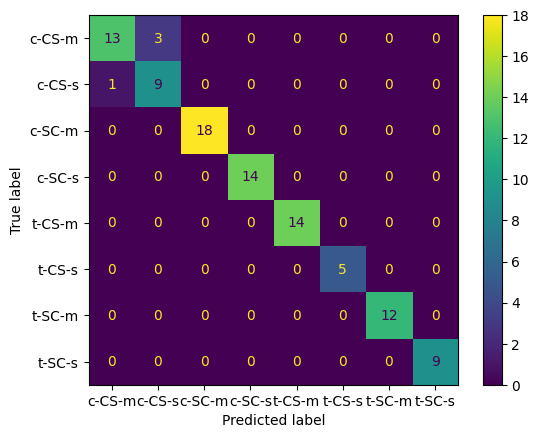

Validation Accuracy: 0.9591836734693877


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(max_depth=7, bootstrap=True)
rfc.fit(X_train, y_train)
rfc_test_predictions = rfc.predict(X_test) 
  
# creating a confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test, rfc_test_predictions) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, rfc_test_predictions)
print(f"Validation Accuracy: {accuracy_validation}")


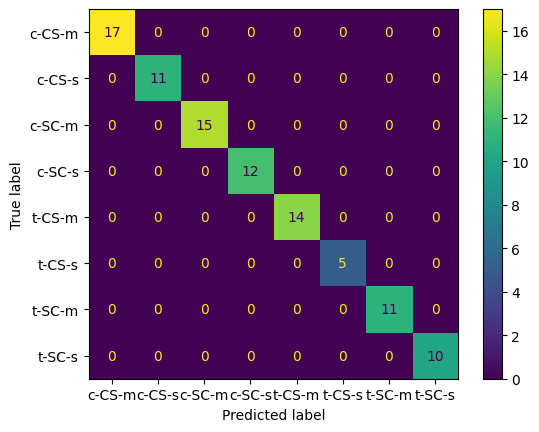

Testing Accuracy: 1.0


In [67]:
#Random forest predictions on second test set
rfc_test2_predictions = rfc.predict(X_test2) 
  
# creating a confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test2, rfc_test2_predictions) 
plt.show()

# print(rfc_predictions)

accuracy_testing = accuracy_score(y_test2, rfc_test2_predictions)
print(f"Testing Accuracy: {accuracy_testing}")



In [68]:
#Trying PCA to reduce dimensions
from sklearn.decomposition import PCA as RandomizedPCA
import numpy as np

pca = RandomizedPCA(n_components=25)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)
PCA_X_test2 = pca.transform(X_test2)

print(len(PCA_X_train[0]))

# PCA_X_train


25


C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


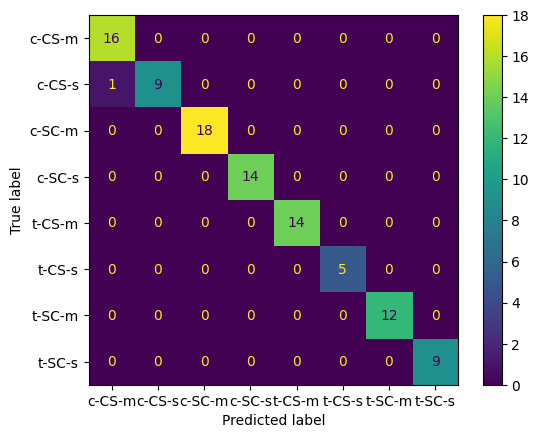

Validation Accuracy: 0.9897959183673469


In [69]:
rfc.fit(PCA_X_train, y_train)
PCA_rfc_test_predictions = rfc.predict(PCA_X_test) 
  
# creating a confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test, PCA_rfc_test_predictions) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, PCA_rfc_test_predictions)
print(f"Validation Accuracy: {accuracy_validation}")

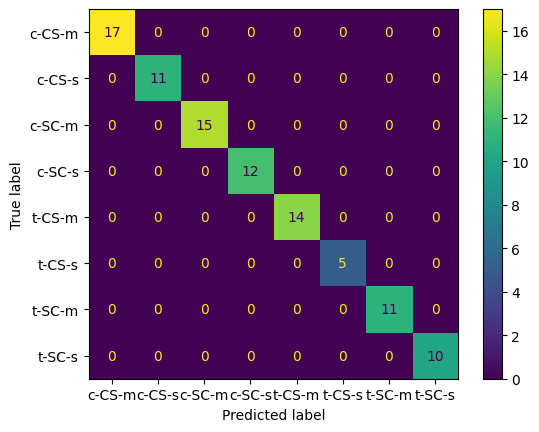

Testing Accuracy: 1.0


In [70]:
# PCA
#Random forest predictions on second test set
PCA_rfc_test2_predictions = rfc.predict(PCA_X_test2) 
  
# creating a confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test2, PCA_rfc_test2_predictions) 
plt.show()

# print(rfc_predictions)

accuracy_testing = accuracy_score(y_test2, PCA_rfc_test2_predictions)
print(f"Testing Accuracy: {accuracy_testing}")


C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


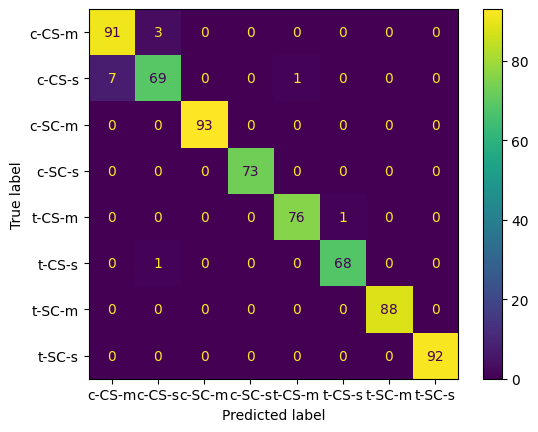

Validation Accuracy: 0.9803921568627451


In [71]:
# Neural network

#MLP training results

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-05, hidden_layer_sizes=(50,), random_state=1)

clf.fit(X_train, y_train)

nnresults = clf.predict(X_train)

ConfusionMatrixDisplay.from_predictions(y_train, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_train, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


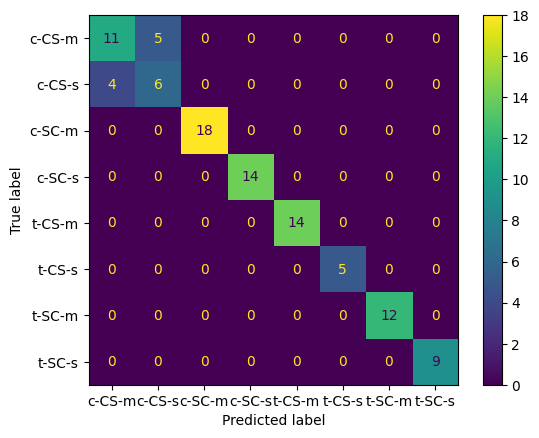

Validation Accuracy: 0.9081632653061225


In [72]:
#MLP validation/test1 data
clf.fit(X_train, y_train)

nnresults = clf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


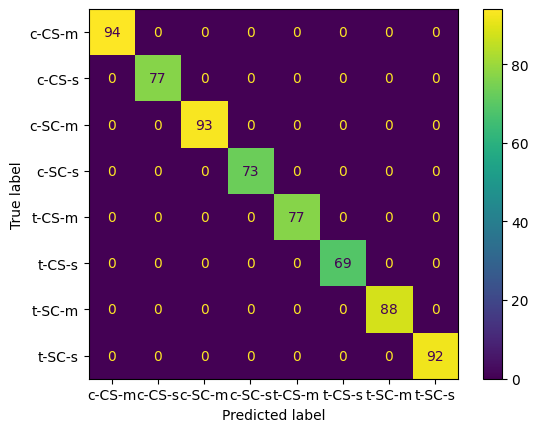

Validation Accuracy: 1.0


In [73]:
#MLP PCA Training data

clf.fit(PCA_X_train, y_train)

nnresults = clf.predict(PCA_X_train)

ConfusionMatrixDisplay.from_predictions(y_train, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_train, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


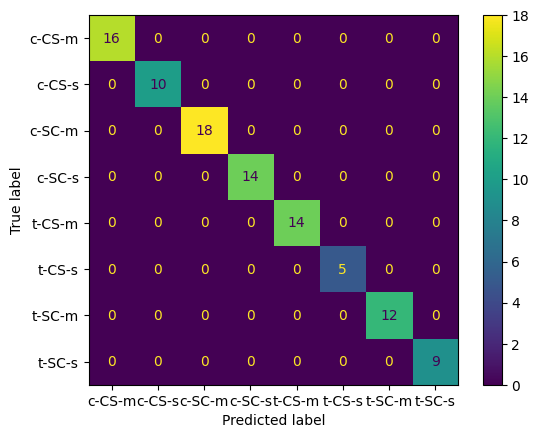

Validation Accuracy: 1.0


In [74]:
#MLP PCA test 1 / validation data
clf.fit(PCA_X_train, y_train)

nnresults = clf.predict(PCA_X_test)

ConfusionMatrixDisplay.from_predictions(y_test, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


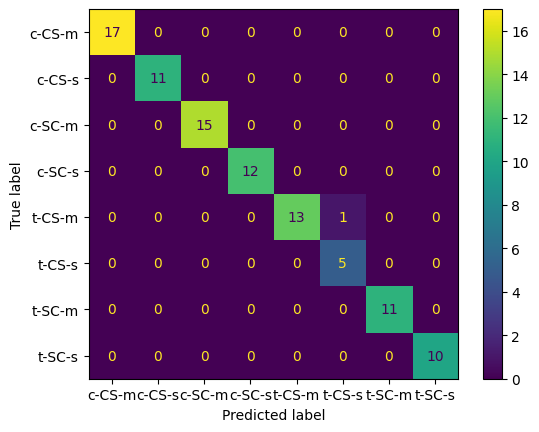

Validation Accuracy: 0.9894736842105263


In [75]:
#MLP PCA test 2 data
clf.fit(PCA_X_train, y_train)

nnresults = clf.predict(PCA_X_test2)

ConfusionMatrixDisplay.from_predictions(y_test2, nnresults) 
plt.show()

# print(rfc_predictions)

accuracy_validation = accuracy_score(y_test2, nnresults)
print(f"Validation Accuracy: {accuracy_validation}")

In [76]:
#Importing PyTorch to look at more deep learning models:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [77]:
#Changing y columns to one hot encoded columns to go into the neural network

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_test2 = pd.get_dummies(y_test2)

y_train

,class_c-CS-m,class_c-CS-s,class_c-SC-m,class_c-SC-s,class_t-CS-m,class_t-CS-s,class_t-SC-m,class_t-SC-s
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
675,False,False,False,False,False,False,False,True
676,False,False,False,False,False,False,False,True
677,False,False,False,False,False,False,False,True
678,False,False,False,False,False,False,False,True


In [78]:
#Defining a class for turning trainingdata into torch tensors

class Data(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values.astype(float), dtype=torch.float32)
        self.y = torch.tensor(y.values.astype(float), dtype=torch.float32)
        self.len = self.X.shape[0]
       
    def __getitem__(self, index):
        return self.X[index], self.y[index]
   
    def __len__(self):
        return self.len
   
batch_size = 64

#Instantiating training and testing data
train_data = Data(X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


In [79]:
#Testing if our data was input correctly

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break



Batch: 1
X shape: torch.Size([64, 71])
y shape: torch.Size([64, 8])


In [80]:
#Creating the neural network

input_dim = 71
hidden_dim = 75
output_dim = 8

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        nn.init.kaiming_uniform_(self.layer_1.weight, nonlinearity="relu")
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = torch.nn.functional.sigmoid(self.layer_2(x))

        return x
    
model = NeuralNetwork(input_dim, hidden_dim, output_dim)
print(model)

NeuralNetwork(
  (layer_1): Linear(in_features=71, out_features=75, bias=True)
  (layer_2): Linear(in_features=75, out_features=8, bias=True)
)


In [81]:
#Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.1

learning_rate = 0.1
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [82]:
n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.4054904282093048
Finished epoch 1, latest loss 0.389997273683548
Finished epoch 2, latest loss 0.38491132855415344
Finished epoch 3, latest loss 0.381123423576355
Finished epoch 4, latest loss 0.37792086601257324
Finished epoch 5, latest loss 0.3747941553592682
Finished epoch 6, latest loss 0.37176379561424255
Finished epoch 7, latest loss 0.36864152550697327
Finished epoch 8, latest loss 0.3655911087989807
Finished epoch 9, latest loss 0.36264166235923767
Finished epoch 10, latest loss 0.3594897389411926
Finished epoch 11, latest loss 0.3565100431442261
Finished epoch 12, latest loss 0.35342323780059814
Finished epoch 13, latest loss 0.35048404335975647
Finished epoch 14, latest loss 0.3475230634212494
Finished epoch 15, latest loss 0.3446405231952667
Finished epoch 16, latest loss 0.34172236919403076
Finished epoch 17, latest loss 0.33891260623931885
Finished epoch 18, latest loss 0.33612173795700073
Finished epoch 19, latest loss 0.33346205949783325
F

In [83]:
# compute accuracy (no_grad is optional)

with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.900390625


In [84]:
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy no grad {accuracy}")

Accuracy no grad 0.900390625


In [85]:
#Same model with PCA

#Need to change PCA dataframes from numpy to pandas
PCA_X_train = pd.DataFrame(PCA_X_train)
PCA_X_test = pd.DataFrame(PCA_X_test)
PCA_X_test2 = pd.DataFrame(PCA_X_test2)

type(PCA_X_train)

pandas.core.frame.DataFrame

In [86]:
# Testing another model (Same model as before but after principal component analysis down to 25 features): 

#Instantiating training and testing data
train_data = Data(PCA_X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(PCA_X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

input_dim = 25
hidden_dim = 100
output_dim = 8

model = NeuralNetwork(input_dim, hidden_dim, output_dim)

#Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.4

learning_rate = 0.4
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # print(f'Finished epoch {epoch}, latest loss {loss}')


# compute accuracy (no_grad is optional)
# with torch.no_grad():

y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Validation Accuracy {accuracy}")

with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Validation Accuracy (no grad) {accuracy}")

#Accuracy changes every time the model is run, so run the model 30 times and compute the average 




Batch: 1
X shape: torch.Size([10, 25])
y shape: torch.Size([10, 8])
Validation Accuracy 1.0
Validation Accuracy (no grad) 1.0


In [87]:
# Original model + PCA on Test 2 Data: 

#Instantiating training and testing data
train_data = Data(PCA_X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(PCA_X_test2, y_test2)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

input_dim = 25
hidden_dim = 100
output_dim = 8

model = NeuralNetwork(input_dim, hidden_dim, output_dim)

#Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.1

learning_rate = 0.4
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # print(f'Finished epoch {epoch}, latest loss {loss}')


# compute accuracy (no_grad is optional)
# with torch.no_grad():
y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Test 2 Accuracy {accuracy}")


#Accuracy changes every time the model is run, so run the model 30 times and compute the average 




Batch: 1
X shape: torch.Size([10, 25])
y shape: torch.Size([10, 8])
Test 2 Accuracy 0.987500011920929


Source for original code for pytorch neural network:

https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch

In [88]:
#RUN our test 2 30 times and compute the average because the test accuracy will change each time:

n = 30 #Number of times we will run the test 
x = 0 #Placeholder variable

for testnumber in range(n):

    for batch, (X, y) in enumerate(train_dataloader):
        # print(f"Batch: {batch+1}")
        # print(f"X shape: {X.shape}")
        # print(f"y shape: {y.shape}")
        break

    input_dim = 25
    hidden_dim = 100
    output_dim = 8

    model = NeuralNetwork(input_dim, hidden_dim, output_dim)

    #Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.1

    learning_rate = 0.4
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    n_epochs = 100
    batch_size = 10
    
    for epoch in range(n_epochs):
        for i in range(0, len(X), batch_size):
            Xbatch = X[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = y[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # print(f'Finished epoch {epoch}, latest loss {loss}')


    # compute accuracy (no_grad is optional)
    # with torch.no_grad():
    y_pred = model(X)
    accuracy = (y_pred.round() == y).float().mean()
    # print(f"Test 2 Accuracy {accuracy}")
    print(f'Test {testnumber + 1} complete')
    x += accuracy

mean_accuracy = x/n

print(f'(Test 2 Mean Accuracy: {mean_accuracy})')

    #Accuracy changes every time the model is run, so run the model 30 times and compute the average 

Test 1 complete
Test 2 complete
Test 3 complete
Test 4 complete
Test 5 complete
Test 6 complete
Test 7 complete
Test 8 complete
Test 9 complete
Test 10 complete
Test 11 complete
Test 12 complete
Test 13 complete
Test 14 complete
Test 15 complete
Test 16 complete
Test 17 complete
Test 18 complete
Test 19 complete
Test 20 complete
Test 21 complete
Test 22 complete
Test 23 complete
Test 24 complete
Test 25 complete
Test 26 complete
Test 27 complete
Test 28 complete
Test 29 complete
Test 30 complete
(Test 2 Mean Accuracy: 0.9879166483879089)


In [89]:
# Testing another model (Same model: PCA, but with different optimizers)

#Instantiating training and testing data
train_data = Data(PCA_X_train, y_train)
train_dataloader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = Data(PCA_X_test, y_test)
test_dataloader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch+1}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")
    break

input_dim = 25
hidden_dim = 100
output_dim = 8

model = NeuralNetwork(input_dim, hidden_dim, output_dim)

# Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.4
# For presentation:
# Original: BCE -> 96% - 100%
# Tried Mean absolute error -> performed worse
# Mean Squared Error -> 92% - 100%
# Cross Entropy Loss -> 93% - 100%
# Hinge Embedding Loss -> 60% - 70%
# Kullback-Leibler Divergence Loss -> 20%


#Sources:
#https://neptune.ai/blog/pytorch-loss-functions


learning_rate = 0.4
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_epochs = 100
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # print(f'Finished epoch {epoch}, latest loss {loss}')


# compute accuracy (no_grad is optional)
# with torch.no_grad():

y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Validation Accuracy {accuracy}")

with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Validation Accuracy (no grad) {accuracy}")

#Accuracy changes every time the model is run, so run the model 30 times and compute the average 




Batch: 1
X shape: torch.Size([10, 25])
y shape: torch.Size([10, 8])
Validation Accuracy 0.9624999761581421
Validation Accuracy (no grad) 0.9624999761581421


In [90]:
#Now trying the same model but with MSE loss and different preoptimizer algorithms

n = 30 #Number of times we will run the test 
x = 0 #Placeholder variable

for testnumber in range(n):

    for batch, (X, y) in enumerate(train_dataloader):
        # print(f"Batch: {batch+1}")
        # print(f"X shape: {X.shape}")
        # print(f"y shape: {y.shape}")
        break

    input_dim = 25
    hidden_dim = 100
    output_dim = 8

    model = NeuralNetwork(input_dim, hidden_dim, output_dim)

    #Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.1

    #Testing out different optimizers:
    #ORiginal: Stochastic gradient descent default param -> 96.2%
    # Adadelta algorithm -> 95.1%
    # Adagrad algorithm -> 92.4%
    # Adam algorithm -> 89.6%
    # AdamW algorithm -> 89.7%
    # Adamax algorithm -> 90%
    # ASGD (Average Stochastic gradient descent) -> 97.3%
    # L-BFGS algorithm

    #Source: https://pytorch.org/docs/stable/optim.html


    learning_rate = 0.4
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

    n_epochs = 100
    batch_size = 10
    
    for epoch in range(n_epochs):
        for i in range(0, len(X), batch_size):
            Xbatch = X[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = y[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # print(f'Finished epoch {epoch}, latest loss {loss}')


    # compute accuracy (no_grad is optional)
    # with torch.no_grad():
    y_pred = model(X)
    accuracy = (y_pred.round() == y).float().mean()
    # print(f"Test 2 Accuracy {accuracy}")
    print(f'Test {testnumber + 1} complete')
    x += accuracy

mean_accuracy = x/n

print(f'(Test 2 Mean Accuracy: {mean_accuracy})')

    #Accuracy changes every time the model is run, so run the model 30 times and compute the average 

Test 1 complete
Test 2 complete
Test 3 complete
Test 4 complete
Test 5 complete
Test 6 complete
Test 7 complete
Test 8 complete
Test 9 complete
Test 10 complete
Test 11 complete
Test 12 complete
Test 13 complete
Test 14 complete
Test 15 complete
Test 16 complete
Test 17 complete
Test 18 complete
Test 19 complete
Test 20 complete
Test 21 complete
Test 22 complete
Test 23 complete
Test 24 complete
Test 25 complete
Test 26 complete
Test 27 complete
Test 28 complete
Test 29 complete
Test 30 complete
(Test 2 Mean Accuracy: 0.9704167246818542)


In [91]:
#Now trying the same model back to BCE loss, ASGD (Average Stochastic gradient descent), lower learning rate to be more precise, and more epochs

n = 30 #Number of times we will run the test 
x = 0 #Placeholder variable

for testnumber in range(n):

    for batch, (X, y) in enumerate(train_dataloader):
        # print(f"Batch: {batch+1}")
        # print(f"X shape: {X.shape}")
        # print(f"y shape: {y.shape}")
        break

    input_dim = 25
    hidden_dim = 100
    output_dim = 8

    model = NeuralNetwork(input_dim, hidden_dim, output_dim)

    #Using Binary Crossentropy and Stochastic Gradient Descent with a learning rate of 0.1

    #Testing out different optimizers:
    # Original: Stochastic gradient descent default param -> 96.2%
    # Adadelta algorithm -> 95.1%
    # Adagrad algorithm -> 92.4%
    # Adam algorithm -> 89.6%
    # AdamW algorithm -> 89.7%
    # Adamax algorithm -> 90%
    # ASGD (Average Stochastic gradient descent) -> 97.3%
    # L-BFGS algorithm

    #Source: https://pytorch.org/docs/stable/optim.html


    learning_rate = 0.3
    loss_fn = nn.BCELoss()
    optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

    n_epochs = 300
    batch_size = 10
    
    for epoch in range(n_epochs):
        for i in range(0, len(X), batch_size):
            Xbatch = X[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = y[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        # print(f'Finished epoch {epoch}, latest loss {loss}')


    # compute accuracy (no_grad is optional)
    # with torch.no_grad():
    y_pred = model(X)
    accuracy = (y_pred.round() == y).float().mean()
    # print(f"Test 2 Accuracy {accuracy}")
    print(f'Test {testnumber + 1} complete')
    x += accuracy

mean_accuracy = x/n

print(f'(Test 2 Mean Accuracy: {mean_accuracy})')

    #Accuracy changes every time the model is run, so run the model 30 times and compute the average 

Test 1 complete
Test 2 complete
Test 3 complete
Test 4 complete
Test 5 complete
Test 6 complete
Test 7 complete
Test 8 complete
Test 9 complete
Test 10 complete
Test 11 complete
Test 12 complete
Test 13 complete
Test 14 complete
Test 15 complete
Test 16 complete
Test 17 complete
Test 18 complete
Test 19 complete
Test 20 complete
Test 21 complete
Test 22 complete
Test 23 complete
Test 24 complete
Test 25 complete
Test 26 complete
Test 27 complete
Test 28 complete
Test 29 complete
Test 30 complete
(Test 2 Mean Accuracy: 0.9995833039283752)
